In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
dfgs = pd.read_csv('title_genre_score_ext.csv')

In [79]:
dfgs.shape

(5043, 28)

In [80]:
dfgs.head()

,Title,Director,Duration,Language,Country,Rated,Action,Adventure,Fantasy,Sci-Fi,...,Western,Drama,History,Sport,Crime,Horror,War,Biography,Music,ImdbScore
0,Avatar,James Cameron,178.0,English,USA,PG-13,1,1,1,1,...,0,0,0,0,0,0,0,0,0,7.9
1,Pirates of the Caribbean: At World's End,Gore Verbinski,169.0,English,USA,PG-13,1,1,1,0,...,0,0,0,0,0,0,0,0,0,7.1
2,Spectre,Sam Mendes,148.0,English,UK,PG-13,1,1,0,0,...,0,0,0,0,0,0,0,0,0,6.8
3,The Dark Knight Rises,Christopher Nolan,164.0,English,USA,PG-13,1,0,0,0,...,0,0,0,0,0,0,0,0,0,8.5
4,Star Wars: Episode VII - The Force Awakens,Doug Walker,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.1


In [4]:
%matplotlib inline

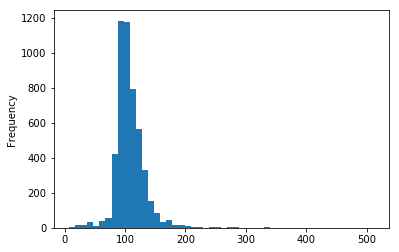

In [5]:
dfgs.Duration.plot.hist(bins = 50)

In [10]:
genre_vals = dfgs.iloc[:,6:27]  #Selecting all rows for the genre columns

In [25]:
headings = dfgs.columns[6:27]   #Selecting column headers for genres

In [27]:
vals = pd.Series()

In [43]:
headings

Index(['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller', 'Documentary',
       'Romance', 'Animation', 'Comedy', 'Family', 'Musical', 'Mystery',
       'Western', 'Drama', 'History', 'Sport', 'Crime', 'Horror', 'War',
       'Biography', 'Music'],
      dtype='object')

In [51]:
def countgenre(i):
    return max(dfgs[headings[i]].cumsum())

In [56]:
yvals = [countgenre(i) for i in range(21)]

In [89]:
genre_count = pd.Series(yvals, index = headings)

In [87]:
genre_count

Action         1153
Adventure       923
Fantasy         610
Sci-Fi          616
Thriller       1411
Documentary     121
Romance        1107
Animation       242
Comedy         1872
Family          546
Musical         132
Mystery         500
Western          97
Drama          2594
History         207
Sport           182
Crime           889
Horror          565
War             213
Biography       293
Music           214
dtype: int64

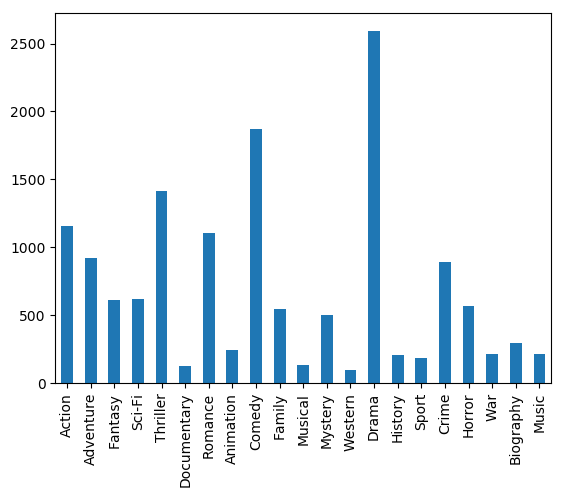

In [92]:
genre_count.plot(kind='bar')

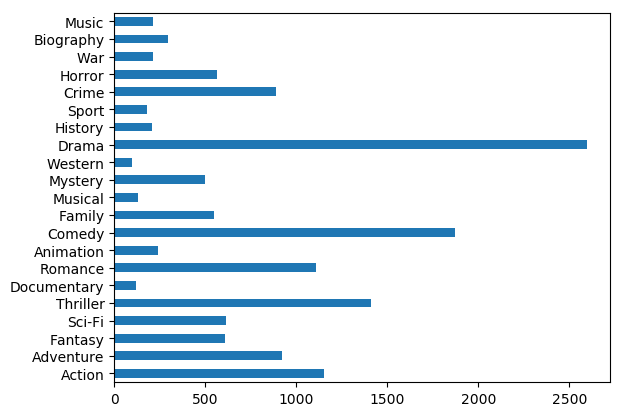

In [120]:
genre_count.plot(kind='barh')

In [156]:
dfgs.Genre_groups = ""

In [167]:
dfgs.loc[((dfgs.Horror == True) | 
         (dfgs.War == True) |
         (dfgs.Crime == True) |
         (dfgs.Drama == True)) &
         (dfgs.Comedy == False)         
         , 'Genre_groups'] = 'Dark'

In [168]:
dfgs.loc[dfgs.Genre_groups == 'Dark', 'Genre_groups'].count()

2480

In [169]:
dfgs.loc[((dfgs.Comedy == True) | 
         (dfgs.Musical == True) |
         (dfgs.Family == True) |
         (dfgs.Romance == True) |
         (dfgs.Animation == True)) &
         (dfgs.Genre_groups != 'Dark')
         , 'Genre_groups'] = 'Light'

In [170]:
dfgs.loc[dfgs.Genre_groups == 'Light', 'Genre_groups'].count()

2037

In [178]:
dfgs.loc[((dfgs.Documentary == True) | 
         (dfgs.History == True) |
         (dfgs.Biography == True) | 
         (dfgs.Music == True)) &
         (dfgs.Genre_groups != 'Dark') &
         (dfgs.Genre_groups != 'Light')
         , 'Genre_groups'] = 'Factual'

In [179]:
dfgs.loc[dfgs.Genre_groups == 'Factual', 'Genre_groups'].count()

92

In [180]:
dfgs.loc[((dfgs.Action == True) | 
         (dfgs.Adventure == True) |
         (dfgs.Fantasy == True) |
         (dfgs['Sci-Fi'] == True) |
         (dfgs.Thriller == True) |
         (dfgs.Western == True)) &
         (dfgs.Genre_groups != 'Dark') &
         (dfgs.Genre_groups != 'Light') &
         (dfgs.Genre_groups != 'Factual')
         , 'Genre_groups'] = 'Thrill'

In [181]:
dfgs.loc[dfgs.Genre_groups == 'Thrill', 'Genre_groups'].count()

434

In [182]:
dfgs.to_csv('title_genre_scores_plus.csv')

In [183]:
dfgs.loc[dfgs.Genre_groups == '']

,Title,Director,Duration,Language,Country,Rated,Action,Adventure,Fantasy,Sci-Fi,...,Drama,History,Sport,Crime,Horror,War,Biography,Music,ImdbScore,Genre_groups


In [225]:
dark = dfgs.loc[dfgs.Genre_groups == 'Dark']
light = dfgs.loc[dfgs.Genre_groups == 'Light']
factual = dfgs.loc[dfgs.Genre_groups == 'Factual']
thrill = dfgs.loc[dfgs.Genre_groups == 'Thrill']

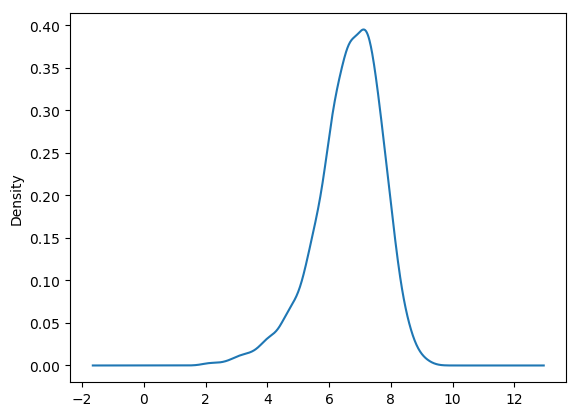

In [192]:
dark.ImdbScore.plot(kind='density')

In [195]:
%matplotlib inline

In [204]:
df4 = pd.DataFrame({'Dark': dark.ImdbScore, 'Light': light.ImdbScore, 'Factual': factual.ImdbScore, 'Thrill': thrill.ImdbScore}, columns=['Dark','Light','Factual','Thrill'])

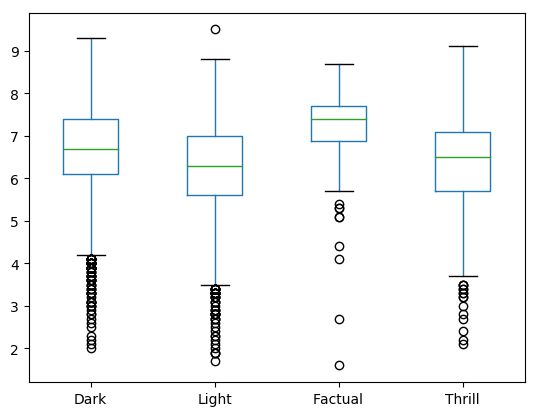

In [206]:
df4.plot(kind='box')

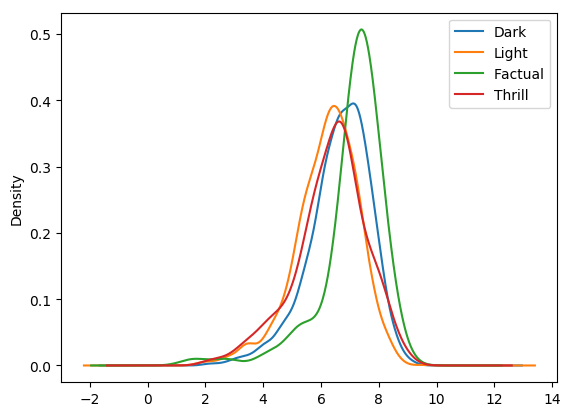

In [207]:
df4.plot(kind='density')

In [226]:
darksub = dark[['Duration','ImdbScore','Genre_groups']]
lightsub = light[['Duration','ImdbScore','Genre_groups']]
factualsub = factual[['Duration','ImdbScore','Genre_groups']]
thrillsub = thrill[['Duration','ImdbScore','Genre_groups']]

,Duration,ImdbScore,Genre_groups
22,156.0,6.7,Dark
25,201.0,7.2,Dark
26,194.0,7.7,Dark
45,140.0,7.2,Dark
46,123.0,7.0,Dark
50,143.0,7.3,Dark
61,96.0,6.8,Dark
63,110.0,6.6,Dark
66,152.0,9.0,Dark
70,126.0,7.5,Dark


In [236]:
dfgsub = dfgs[['Duration', 'ImdbScore', 'Genre_groups']]

In [237]:
dfgsub.head()

,Duration,ImdbScore,Genre_groups
0,178.0,7.9,Thrill
1,169.0,7.1,Thrill
2,148.0,6.8,Thrill
3,164.0,8.5,Thrill
4,NaN,7.1,Factual


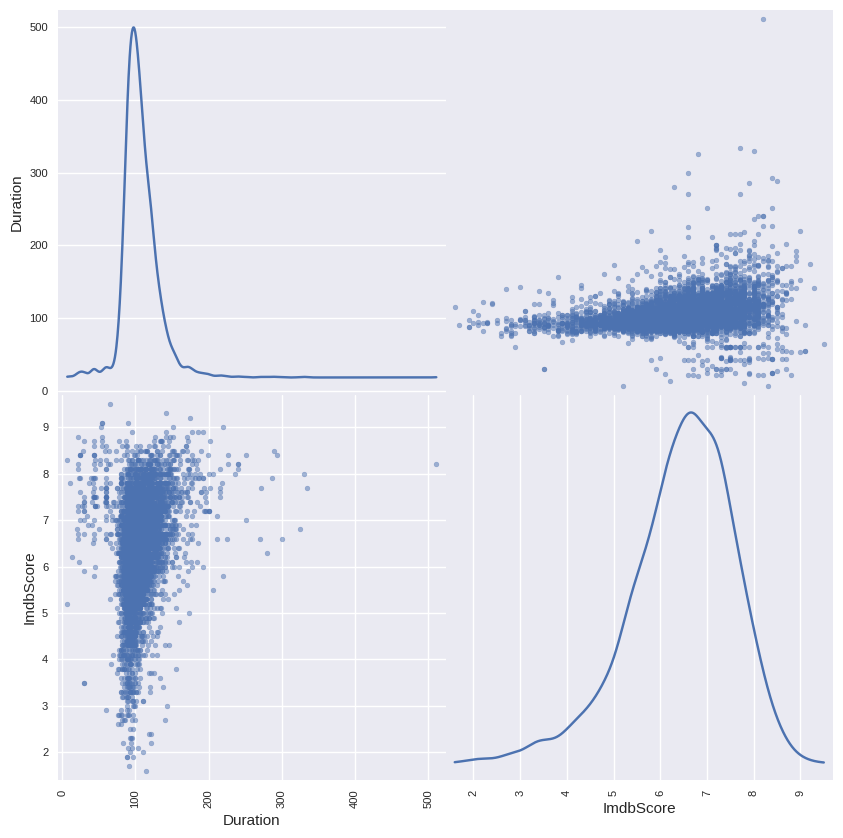

In [239]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix = scatter_matrix(dfgsub, figsize=(10,10), diagonal='kde')

In [240]:
X = dfgsub.iloc[:, 0:-1].values
y = dfgsub.iloc[:, -1].values

In [241]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

/home/katja/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [256]:
dfclean = dfgsub.dropna()

In [259]:
X = dfclean.iloc[:, 0:-1].values
y = dfclean.iloc[:, -1].values

In [260]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [261]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [265]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
X_train_mm = mmsc.fit_transform(X_train)
X_test_mm = mmsc.transform(X_test)

In [268]:
from sklearn.neighbors import KNeighborsClassifier

In [269]:
knn = KNeighborsClassifier(n_neighbors=5, algorithm='brute', metric='minkowski', p=2, weights='uniform')

In [270]:
movies_knn = knn.fit(X_train, y_train)

In [271]:
movies_knn.score(X_test, y_test)

0.54141815772034463